In [5]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
file_path = '/content/insurance.csv'  # Corrigido o erro de sintaxe
insurance_data = pd.read_csv(file_path)

# Visualizar as primeiras linhas dos dados
print(insurance_data.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


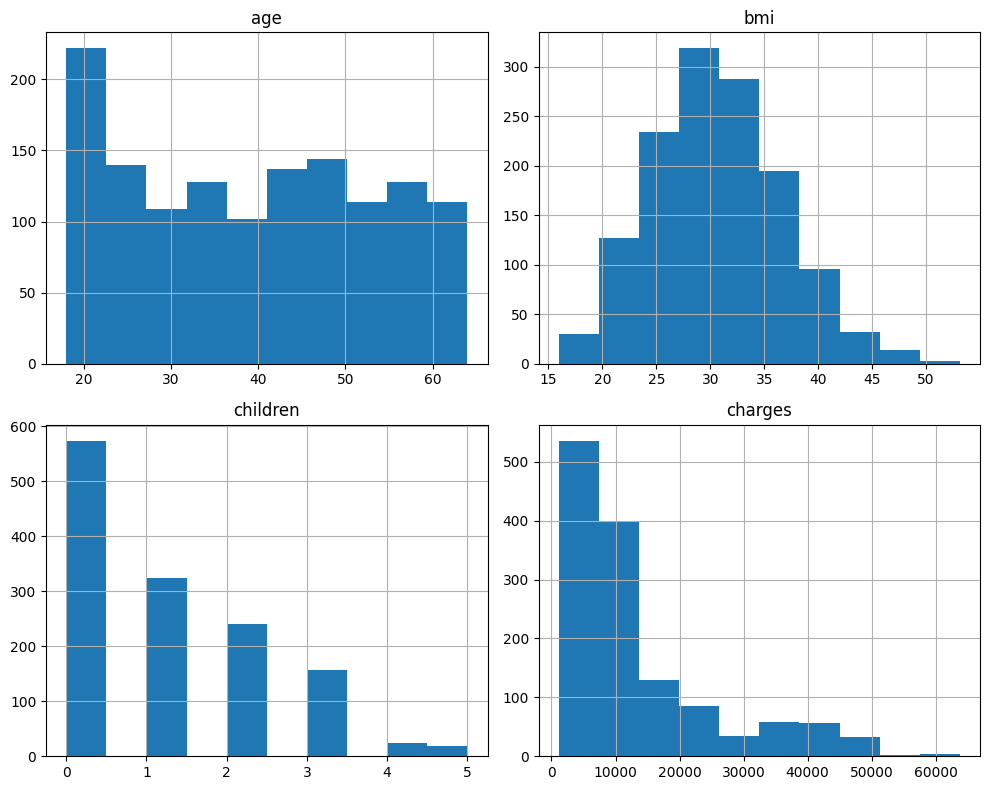

In [6]:

# Visualizar as primeiras linhas dos dados
print(insurance_data.head())

# Estatísticas descritivas
print(insurance_data.describe())

# Visualizar distribuições das variáveis numéricas
insurance_data[['age', 'bmi', 'children', 'charges']].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()





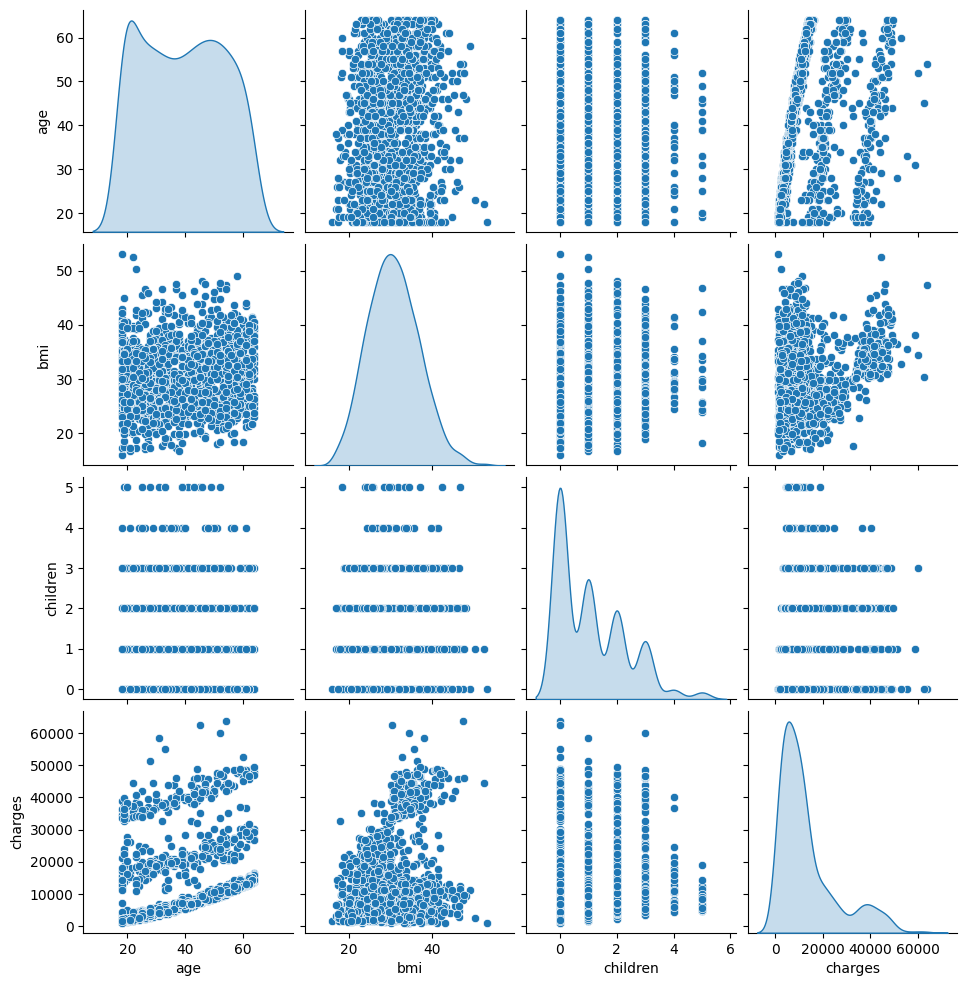

In [7]:
# Gráficos de dispersão entre 'charges' e outras variáveis numéricas
sns.pairplot(insurance_data[['age', 'bmi', 'children', 'charges']], diag_kind='kde')
plt.show()



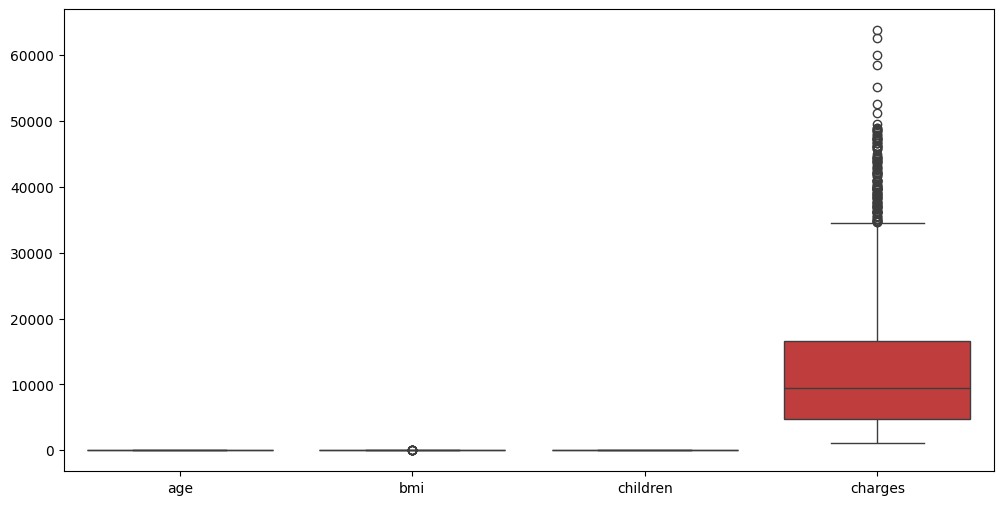

In [6]:
# Boxplot para verificar outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=insurance_data[['age', 'bmi', 'children', 'charges']])
plt.show()


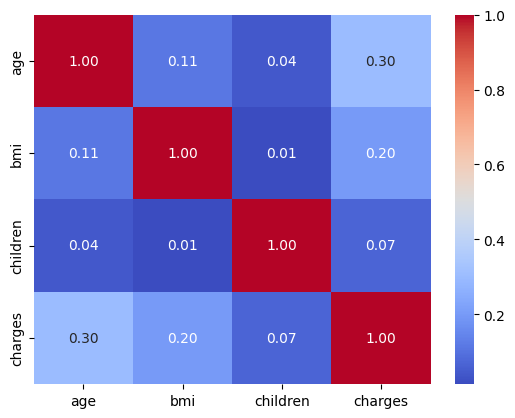

In [8]:
# Análise de correlação entre as variáveis
correlation_matrix = insurance_data[['age', 'bmi', 'children', 'charges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Pré-processamento dos Dados

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Verificar valores ausentes
print(insurance_data.isnull().sum())

# Codificação das variáveis categóricas 'sex', 'smoker' e 'region'
label_encoder = LabelEncoder()
insurance_data['sex'] = label_encoder.fit_transform(insurance_data['sex'])
insurance_data['smoker'] = label_encoder.fit_transform(insurance_data['smoker'])
insurance_data['region'] = label_encoder.fit_transform(insurance_data['region'])

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
# Normalização das variáveis numéricas (age, bmi, children)
scaler = StandardScaler()
insurance_data[['age', 'bmi', 'children']] = scaler.fit_transform(insurance_data[['age', 'bmi', 'children']])


In [9]:
# Separando as variáveis independentes (X) e dependente (y)
X = insurance_data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = insurance_data['charges']

# Divisão em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construção do Modelo de Regressão Linear

In [10]:
from sklearn.linear_model import LinearRegression

# Criar o modelo
model = LinearRegression()

# Treinamento do modelo
model.fit(X_train, y_train)

# Coeficientes do modelo
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)


Coeficientes: [ 3.61028043e+03 -1.87914567e+01  2.04689296e+03  5.12253132e+02
  2.36478181e+04 -2.71284266e+02]
Intercepto: 8893.446206990173


# Avaliação do Modelo

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predições no conjunto de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R²:", r2)
print("RMSE:", rmse)


R²: 0.7833463107364538
RMSE: 5799.587091438358


# Validação e Refinamento

In [12]:
from sklearn.model_selection import cross_val_score

# Validação cruzada
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Validação cruzada (MSE negativo):", cv_scores)


Validação cruzada (MSE negativo): [-37102747.82345616 -37875978.8408245  -32601556.68502287
 -39539169.9912154  -37192527.95384561]


# Analise de resíduos


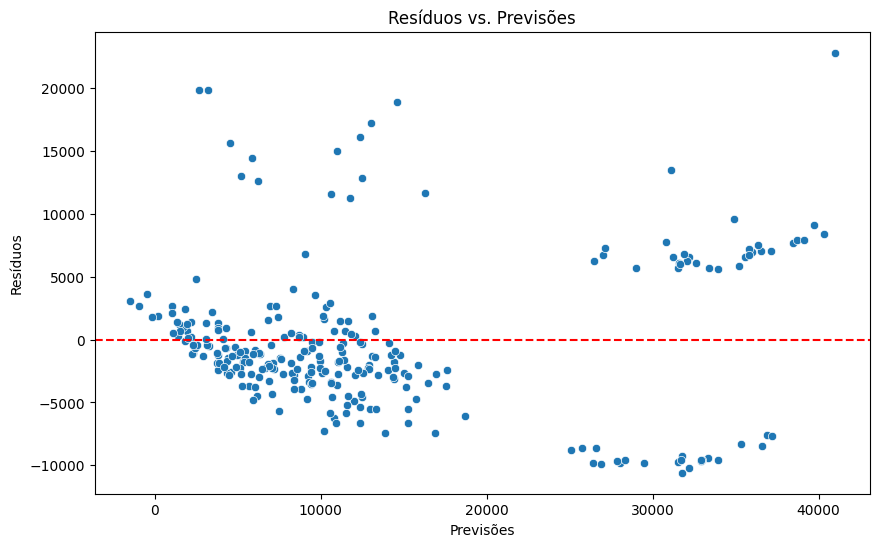

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular os resíduos
residuals = y_test - y_pred

# Plotar os resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs. Previsões')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()




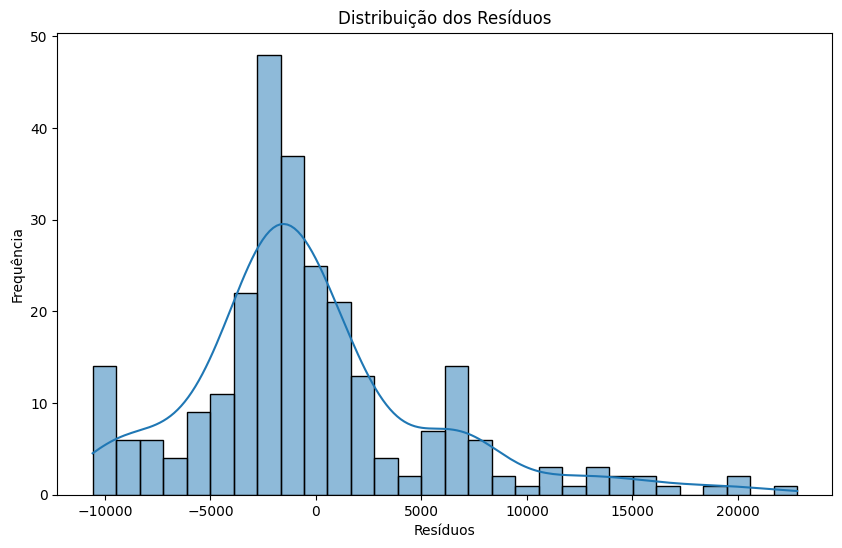

Média dos resíduos: -224.77864300003816
Desvio padrão dos resíduos: 5806.071850216914


In [14]:
# Plotar o histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

# Verificar a média e variância dos resíduos
print("Média dos resíduos:", residuals.mean())
print("Desvio padrão dos resíduos:", residuals.std())

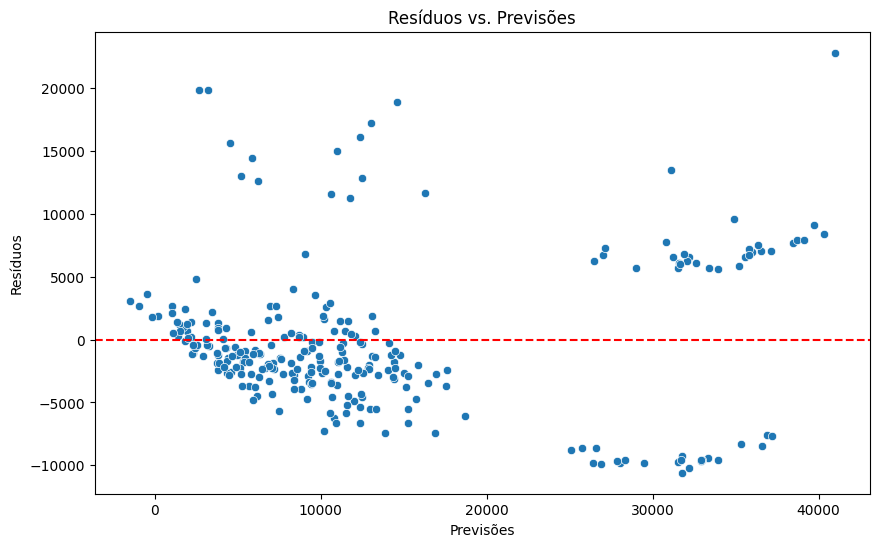

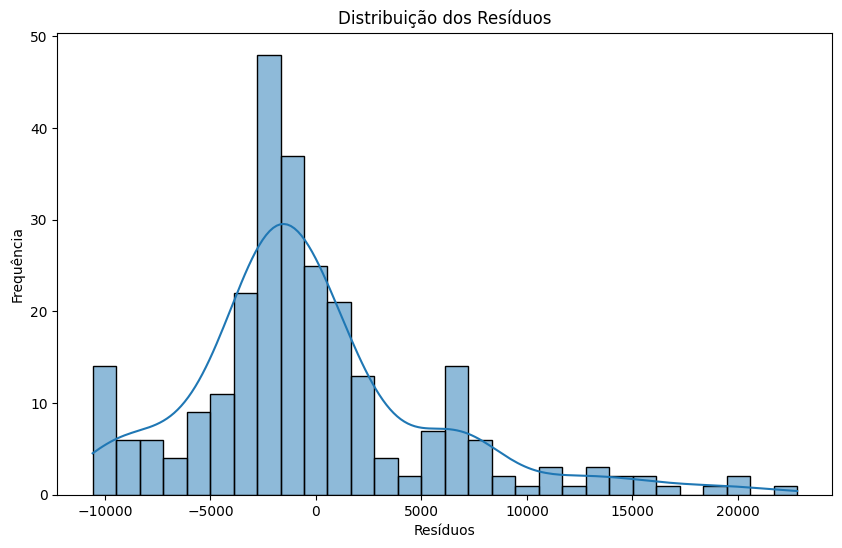

Média dos resíduos: -224.77864300003816
Desvio padrão dos resíduos: 5806.071850216914


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular os resíduos
residuals = y_test - y_pred

# Plotar os resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs. Previsões')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

# Plotar o histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

# Verificar a média e variância dos resíduos
print("Média dos resíduos:", residuals.mean())
print("Desvio padrão dos resíduos:", residuals.std())


##  Análise do Resultado:
* A boa performance em termos de R² (78,3%) indica que, em geral, o modelo está acertando as previsões para a maior parte dos dados.

* RMSE e os resultados da validação cruzada mostram que o modelo ainda pode cometer erros significativos em algumas previsões.

* O erro relativamente alto em algumas divisões (valores negativos de MSE) indica que pode haver oportunidades para melhorar o modelo, talvez incluindo mais variáveis ou ajustando o modelo para capturar melhor as não-linearidades.

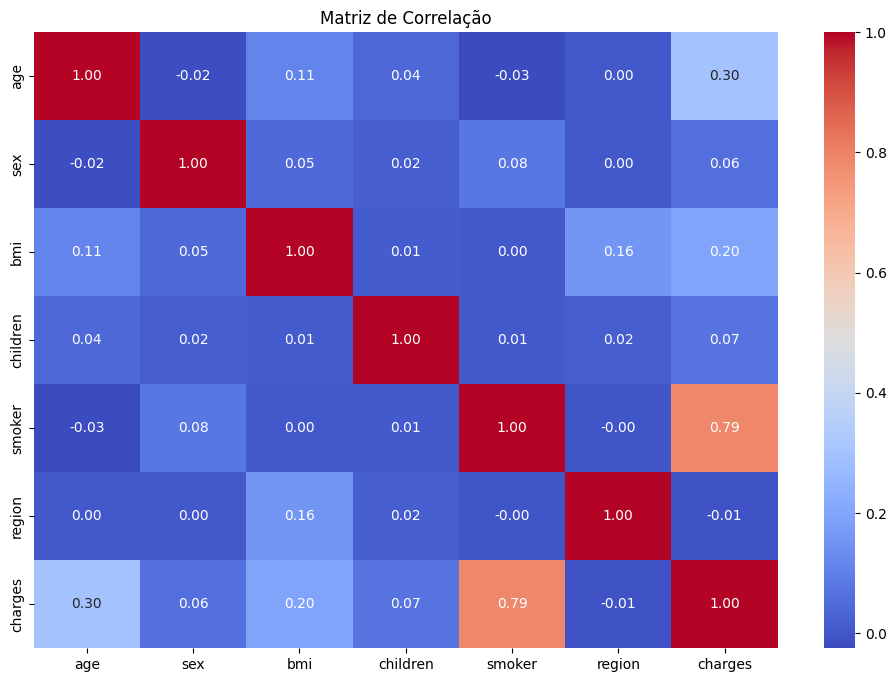

In [16]:
# Calcular a correlação entre as variáveis
corr_matrix = insurance_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()


# Regularização (Lasso e Ridge)


In [17]:
from sklearn.linear_model import Ridge, Lasso

# Modelos de regularização
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Treinando os modelos
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Avaliação do modelo
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

# Comparando desempenho
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

print(f"Ridge RMSE: {ridge_rmse}")
print(f"Lasso RMSE: {lasso_rmse}")


Ridge RMSE: 5803.086313975723
Lasso RMSE: 5799.622551626083


# Testes com outros modelos

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Modelo RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinamento
rf_model.fit(X_train, y_train)

# Previsões
rf_pred = rf_model.predict(X_test)

# Avaliação do modelo
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R²: {rf_r2}")


Random Forest RMSE: 4563.760861975148
Random Forest R²: 0.8658416529065179


# Ajuste Fino e Hiperparâmetros

In [19]:
from sklearn.model_selection import GridSearchCV

# Definir os parâmetros a serem ajustados
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Realizar busca de parâmetros
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor modelo
print("Melhores parâmetros:", grid_search.best_params_)

# Avaliação do modelo otimizado
best_rf_model = grid_search.best_estimator_
best_rf_pred = best_rf_model.predict(X_test)

best_rf_rmse = np.sqrt(mean_squared_error(y_test, best_rf_pred))
best_rf_r2 = r2_score(y_test, best_rf_pred)

print(f"Melhor Random Forest RMSE: {best_rf_rmse}")
print(f"Melhor Random Forest R²: {best_rf_r2}")


Melhores parâmetros: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Melhor Random Forest RMSE: 4540.278122927106
Melhor Random Forest R²: 0.8672187190487749


* Regressão Linear e suas variantes (Ridge e Lasso) não estão capturando bem as não-linearidades e interações das variáveis.

* Random Forest foi muito superior, reduzindo o RMSE em mais de 1200 unidades, o que representa uma grande melhora na acurácia das previsões.

* O ajuste fino (Grid Search) melhorou ainda mais, mesmo com um número reduzido de estimadores (n_estimators=50), o que também impacta positivamente no tempo de processamento.

In [20]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Parâmetros testados
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 10]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 10],
                         'n_estimators': [50, 100]},
             scoring='neg_root_mean_squared_error')

# Atribuir melhor modelo

In [21]:
best_rf_model = grid_search.best_estimator_


# Importância das Features

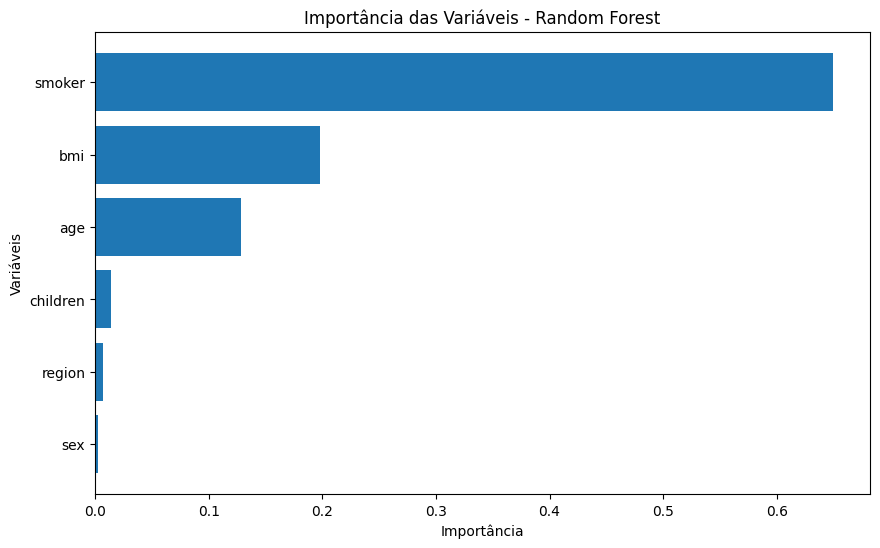

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Pega a importância de cada variável
feature_importances = best_rf_model.feature_importances_
features = X.columns  # Certifique-se de estar usando o mesmo X do treino

# Organiza em um DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis - Random Forest')
plt.gca().invert_yaxis()
plt.show()


# Avaliar o modelo com métricas finais


In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Previsões com dados de teste
y_pred = best_rf_model.predict(X_test)

# Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE Final: {rmse}")
print(f"R² Final: {r2}")


RMSE Final: 4540.278122927106
R² Final: 0.8672187190487749


In [24]:
import joblib
joblib.dump(best_rf_model, 'modelo_random_forest.pkl')


['modelo_random_forest.pkl']

# Verificando variaveis de maiores impacvtos


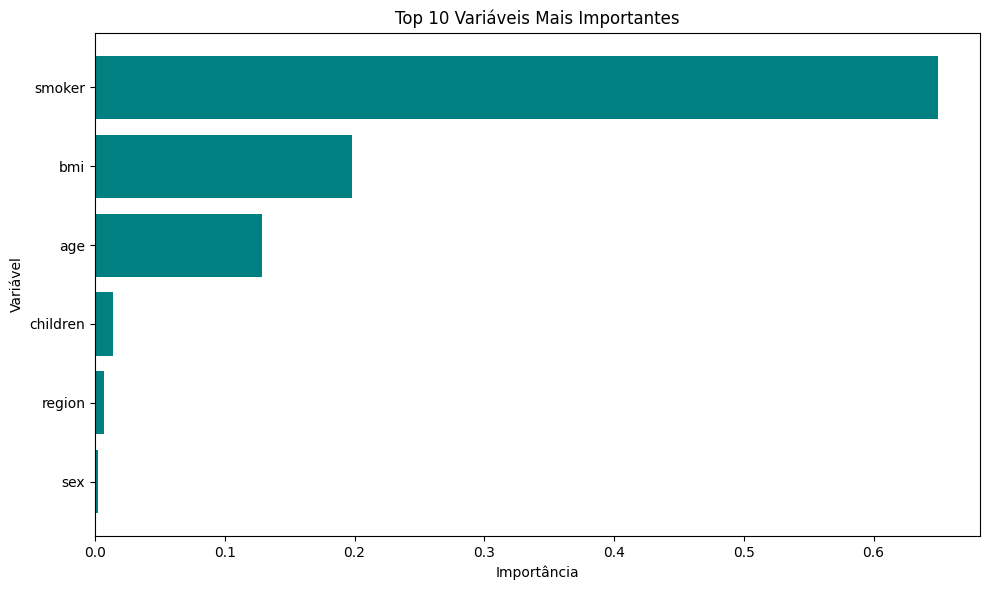

    Feature  Importance
4    smoker    0.649575
2       bmi    0.198430
0       age    0.128625
3  children    0.014096
5    region    0.006736
1       sex    0.002539


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Pegando o melhor modelo encontrado pelo GridSearchCV
best_rf_model = grid_search.best_estimator_

# Extraindo a importância das features
feature_importances = best_rf_model.feature_importances_
features = X_train.columns

# Criando um DataFrame para visualização
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualizando o top 10 (ou todos, se preferir)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1], color='teal')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.title('Top 10 Variáveis Mais Importantes')
plt.tight_layout()
plt.show()

# Se quiser ver o DataFrame completo
print(importance_df)


In [28]:
pip install shap


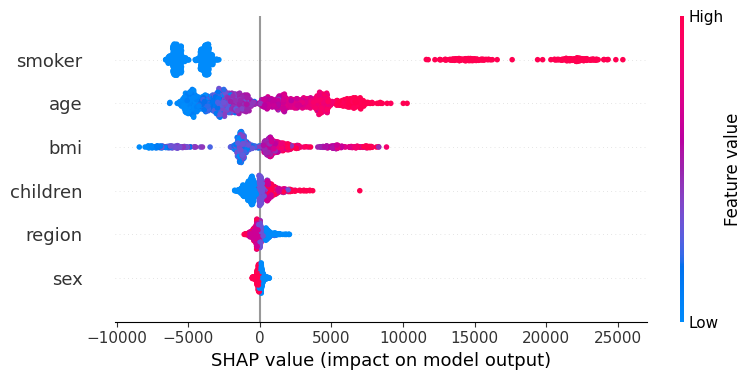

In [32]:
import shap

# Cria o explainer corretamente
explainer = shap.TreeExplainer(best_rf_model)

# Calcula os valores SHAP com check_additivity desativado
shap_values = explainer.shap_values(X_train, check_additivity=False)

# Exibe o gráfico de resumo
shap.summary_plot(shap_values, X_train)


* “Além de treinar um modelo com bom desempenho (RMSE de ~4540 e R² de 0.87),
 utilizei a biblioteca SHAP para gerar interpretabilidade. Isso me permitiu identificar que o fator mais relevante para o custo de seguro saúde foi o tabagismo, seguido da idade e do IMC. Isso é importante pois ajuda o negócio a entender os fatores de risco e potencialmente atuar de forma preventiva.”

# 🧠 Insights do Projeto de Previsão de Custos Médicos

# 🎯 Desempenho do Modelo
Algoritmo utilizado: RandomForestRegressor, otimizado com GridSearchCV.

Métricas finais de desempenho:

RMSE: 4540.28

R²: 0.867

# Resultado indica que o modelo possui alta capacidade preditiva, explicando aproximadamente 87% da variância dos custos médicos.

# 🔍 Importância Global das Variáveis (Feature Importance)
As três variáveis com maior influência no modelo são:

* smoker (fumante)

* bmi (índice de massa corporal)

* age (idade)

* ➤ smoker
Fumar é disparadamente o fator mais relevante no aumento dos custos médicos.

# SHAP
Traz a a informa;áo que os pacientes fumantes (em rosa) possuem alto impacto positivo na previsão de custo, validando o conhecimento médico prévio sobre doenças relacionadas ao tabagismo.

➤ bmi
Altos valores de IMC estão associados a maiores custos.

# O modelo mostra que sobrepeso/obesidade está positivamente correlacionado com despesas médicas.

➤ age
A idade tem impacto progressivo nos custos: quanto mais velho o paciente, maior o custo previsto.

Este comportamento é intuitivo e esperado, refletindo aumento da demanda por serviços de saúde com o envelhecimento.

➤ children, region, sex
Têm impacto menor, mas ainda contribuem.

A variável children sugere leve influência, talvez relacionada à composição familiar do plano.

region e sex aparecem com impacto quase nulo no modelo final.

# 🗣️ Aplicando o SHAP Values
Utilização da biblioteca shap para gerar interpretabilidade:

summary_plot permitiu visualização da direção e intensidade dos impactos.

Reforça transparência e confiança no modelo.

Interpretação dos SHAP values demonstra que o modelo não apenas é acurado, mas também explicável, facilitando a tomada de decisão em contextos reais.

# 📈 Potenciais aplicações no negócio
Direcionamento de políticas preventivas para fumantes e pacientes com alto IMC.

Priorização de grupos de risco em campanhas de saúde.

Precificação mais justa de planos de saúde conforme o perfil do paciente.

*__________________________________________________________________________________________________*

# 🧠 Conclusão do Projeto

* – Previsão de Custos Médicos com Random Forest e SHAP
Este projeto teve como objetivo prever os custos médicos de pacientes com base em características demográficas e de saúde, utilizando um modelo de Random Forest Regressor. A seguir, os principais resultados e aprendizados obtidos:

* ✅ Performance do Modelo
RMSE final: 4.540,27
Um erro médio relativamente baixo, mostrando que o modelo consegue fazer boas previsões de custos com base nos dados fornecidos.

* R² final: 0.867
O modelo explica aproximadamente 87% da variabilidade dos custos médicos, o que é um excelente resultado para problemas de regressão em saúde.

* 🧬 Importância das Variáveis
A análise de importância revelou que as principais variáveis que influenciam os custos médicos são:

* smoker (fumante)

* bmi (índice de massa corporal)

* age (idade)

* Essas variáveis possuem alta correlação com o custo dos planos de saúde e tratamentos, sendo smoker a mais influente, com mais de 64% da importância relativa.

# 📊 SHAP Values
A utilização de SHAP permitiu visualizar o impacto de cada variável individual sobre as previsões:

* Fumantes com alto SHAP Value tendem a ter custos significativamente maiores.

* Altos valores de BMI e idade também influenciam positivamente os custos, como esperado em contexto de saúde.

* O gráfico SHAP também ajudou a confirmar o bom comportamento do modelo, com interpretações alinhadas à lógica médica.

*_________________________________________________________
*

# 💼 Recomendações ao Negócio
Com base nas analises segue recomendações relevantes para o setor de seguros de saúde ou gestão de benefícios corporativos:

# 1. Políticas Preventivas para Fumantes
Como a variável "smoker" foi a mais impactante nos custos, sugerimos implementar programas de cessação do tabagismo.

* Incentivar práticas como apoio psicológico, terapias e benefícios por abandono do cigarro pode reduzir drasticamente os custos médicos no médio/longo prazo.

# 2. Monitoramento e Incentivo à Saúde Preventiva
Variáveis como "bmi" (índice de massa corporal) e "age" também são altamente relevantes.

* Recomenda-se adotar campanhas de controle de peso, alimentação saudável e exercícios físicos para reduzir sinistros relacionados a obesidade e sedentarismo.

Para públicos mais experiente, ampliar exames periódicos e ações de prevenção específicas por faixa etária.

# 3. Modelagem de Risco para Precificação Personalizada

O modelo Random Forest pode ser integrado aos sistemas internos para ajudar na precificação inteligente de planos de saúde, com base em perfis de risco.

Clientes com maior propensão a gerar altos custos podem ser identificados e acompanhados com ações preventivas personalizadas.

# 4. Alocação mais Eficiente de Recursos

Com a previsão mais acurada dos custos, é possível planejar melhor o orçamento, otimizando:

Gestão de sinistros

Negociação com hospitais

Pacotes personalizados por perfil de cliente

# 5. Uso de Modelos Interpretable-by-Design
O uso de SHAP values garante interpretabilidade — essencial no setor da saúde.

Isso fortalece a conformidade regulatória (compliance) e permite tomadas de decisão mais embasadas por stakeholders não técnicos.